## Sine and Cosine analyzed using the new framework

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("../")

from inputs.sensors import Sensor, PerceptualSpace
from inputs.lag_structure import LagStructure

# Visualization libraries
from visualization.sensor_clustering import visualize_cluster_matrix
from visualization.sensors import visualize_SLM
from visualization.sensors import visualize_STDM_seaborn
from visualization.time_cluster import visualize_time_cluster_matrix
from visualization.code_vectors import visualize_code_vectors


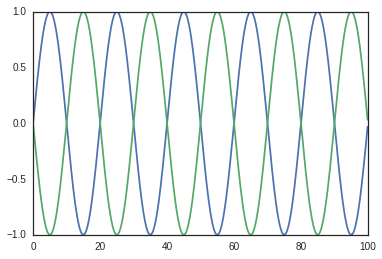

In [13]:
# Time parameters
dt = 0.1
Tmax = 100
Tperiod = 20.0
w = (2 * np.pi) / Tperiod
# w = 4 * (2.0 * np.pi / Tmax)

# Let's get the axuiliary class
t = np.arange(0, Tmax, dt)
sine = np.sin(w * t)
sine_phase = np.sin(w * t + np.pi)

# Plot the things here
%matplotlib inline
plt.plot(t, sine)
plt.hold(True)
plt.plot(t, sine_phase)
plt.show()

In [14]:
 print(Tperiod, w)

20.0 0.3141592653589793


### Here we define the lag structure and the perceptual space

In [15]:
lag_times = np.arange(0, 3 * Tperiod) # Go two times the period
tau = 2 * Tperiod
window_size = 2 * Tperiod
Nwindowsize = int(window_size / dt)
# weights = np.exp( -np.arange(Nwindowsize) / tau) 
weights = None
lag_structure = LagStructure(lag_times=lag_times, weights=weights, window_size=window_size)
sensor1 = Sensor(sine, dt, lag_structure)
sensor2 = Sensor(sine_phase, dt, lag_structure)
sensors = [sensor1, sensor2]
perceptual_space = PerceptualSpace(sensors, lag_first=True)

### Now we declare and process the Nexa Object

In [35]:
from nexa.nexa import Nexa

Nspatial_clusters = 2  # Number of spatial clusters
Ntime_clusters = 4  # Number of time clusters
Nembedding = 3  # Dimension of the embedding space

# Now the Nexa object
nexa_object = Nexa(perceptual_space, Nspatial_clusters,
                   Ntime_clusters, Nembedding)

# Make all the calculations
nexa_object.calculate_all()

#### Visualize SLM

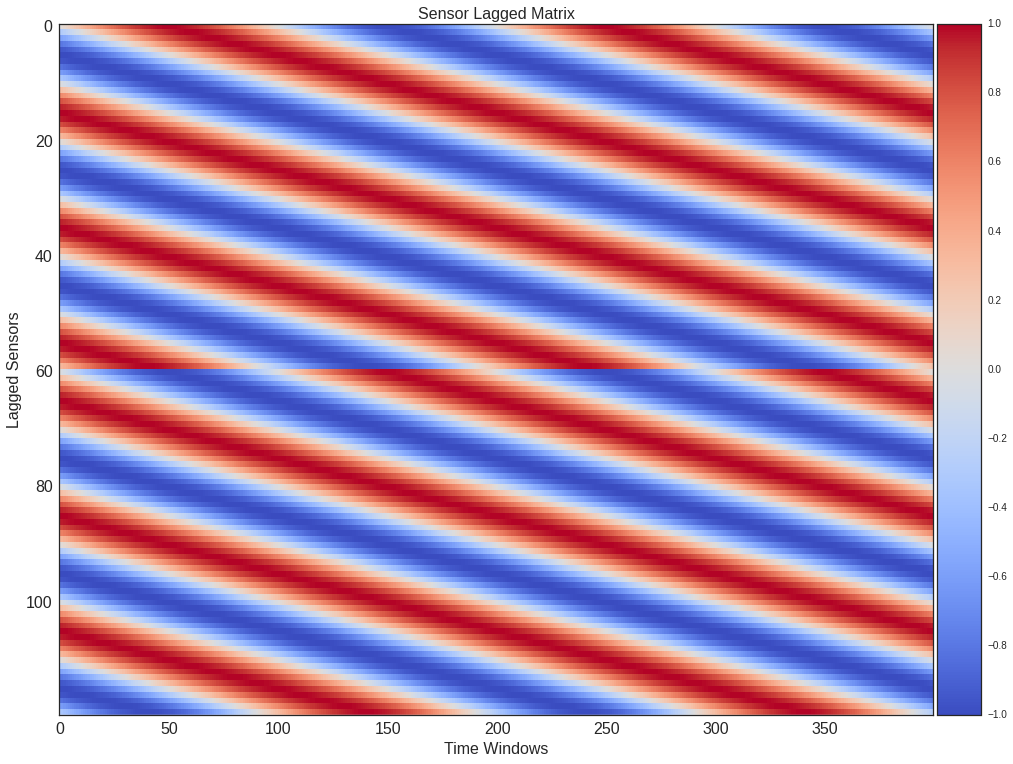

In [36]:
%matplotlib inline
fig = visualize_SLM(nexa_object)
plt.show(fig)

#### Visualize STDM

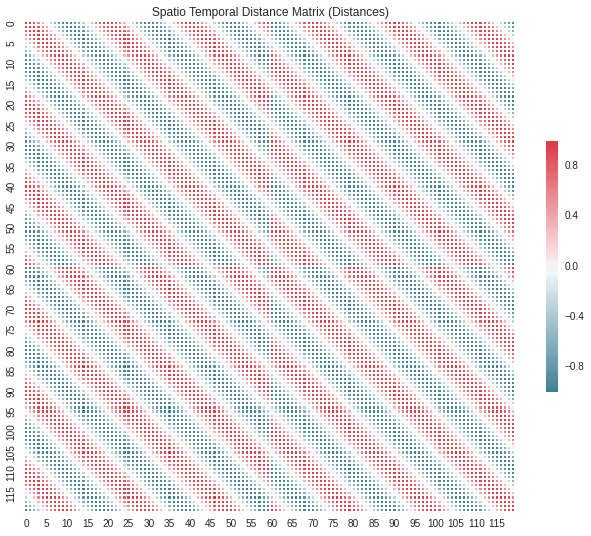

In [37]:
# %matplotlib qt
#  fig = visualize_STDM(nexa_object)
fig = visualize_STDM_seaborn(nexa_object)
plt.show(fig)

#### Visualize Sensor Clustering

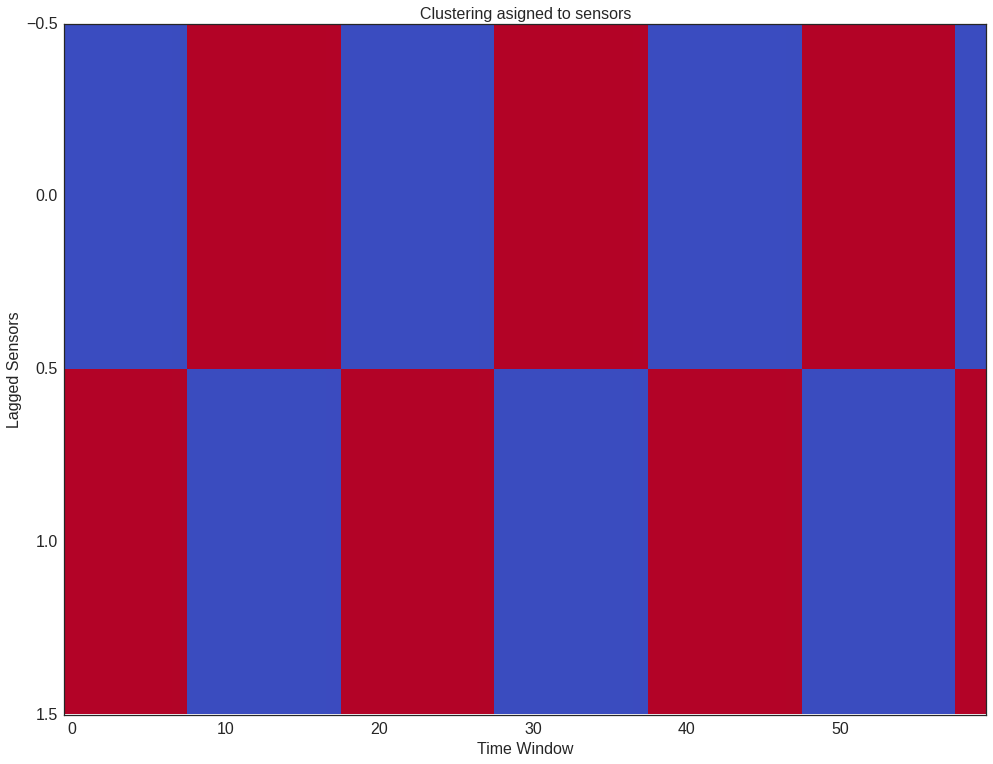

In [38]:
%matplotlib inline
fig = visualize_cluster_matrix(nexa_object)

### Visualize Time Clusters

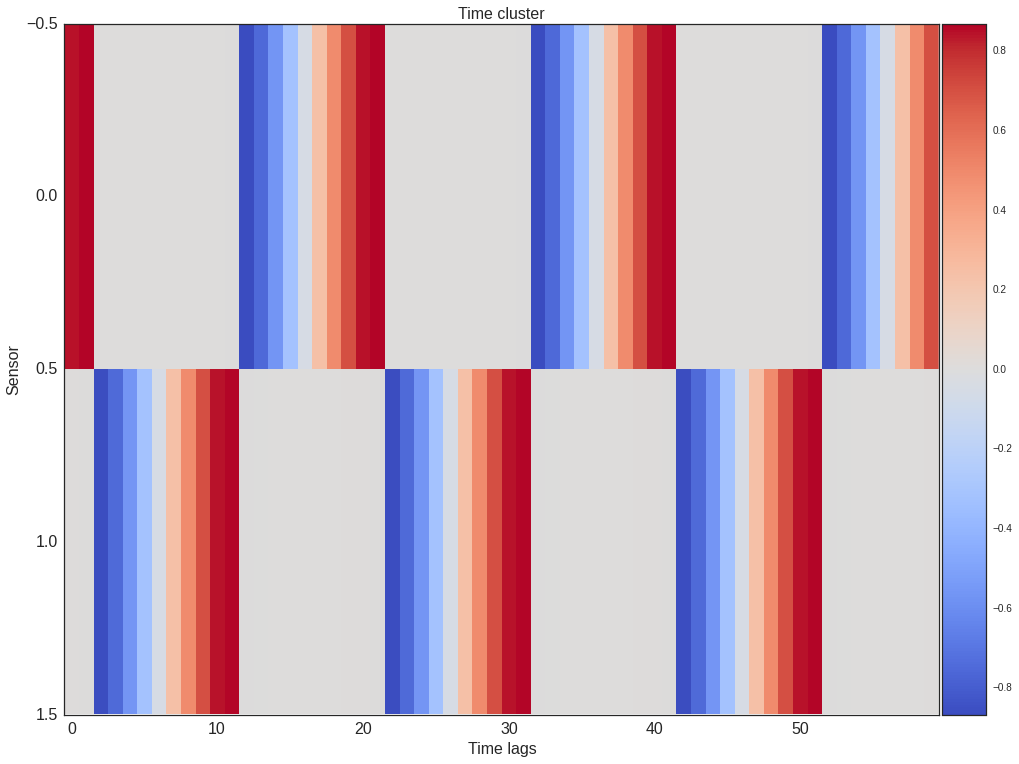

In [34]:
%matplotlib inline
cluster = 1
time_center = 2
fig = visualize_time_cluster_matrix(nexa_object, cluster, time_center,
                                    cmap='coolwarm', inter='none',
                                    origin='upper', fontsize=16)